In [1]:
###特征工程实例
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
%matplotlib inline

In [2]:
train_data = pd.read_csv('tianchi/used_car_train_20200313.csv', sep='\s')
test_data = pd.read_csv('tianchi/used_car_testB_20200421.csv', sep='\s')

In [3]:
train_data.shape, test_data.shape

((150000, 31), (50000, 30))

In [4]:
test_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [5]:
missing = pd.DataFrame(train_data.isnull().sum(), columns=['Missing'])

In [6]:
missing

,Missing
SaleID,0
name,0
regDate,0
model,1
brand,0
bodyType,4506
fuelType,8680
gearbox,5981
power,0
kilometer,0


In [7]:
test_data.notRepairedDamage.value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [8]:
train_data.notRepairedDamage.replace('-', np.nan, inplace=True)

In [9]:
train_data.notRepairedDamage.value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [10]:
test_data.notRepairedDamage.replace('-', np.nan, inplace=True)

In [11]:
test_data.notRepairedDamage.value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

In [12]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [14]:
##清洗异常值
def outliners_proc(data, col_name, scale=3):
    '''
    用于清洗异常值，默认用box_plot(scale=3)清洗
    '''
    
    def box_plot_outliers(data_ser, box_scale):
        '''
        利用箱线图去除异常值
        '''
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)
    
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print('删除了{}行数据'.format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print('现在还有{}条数据'.format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliners = data_series.iloc[index_low]
    print('以下数据小于下界值:')
    print(pd.Series(outliners).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliners = data_series.iloc[index_up]
    print('以下数据大于上界值:')
    print(pd.Series(outliners).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    sns.boxplot(y=data[col_name], data=data, palette='Set1', ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette='Set1', ax=ax[1])
    return data_n


In [13]:
train_data.bodyType.quantile(0.75)

3.0

删除了963行数据
现在还有149037条数据
以下数据小于下界值:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
以下数据大于上界值:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


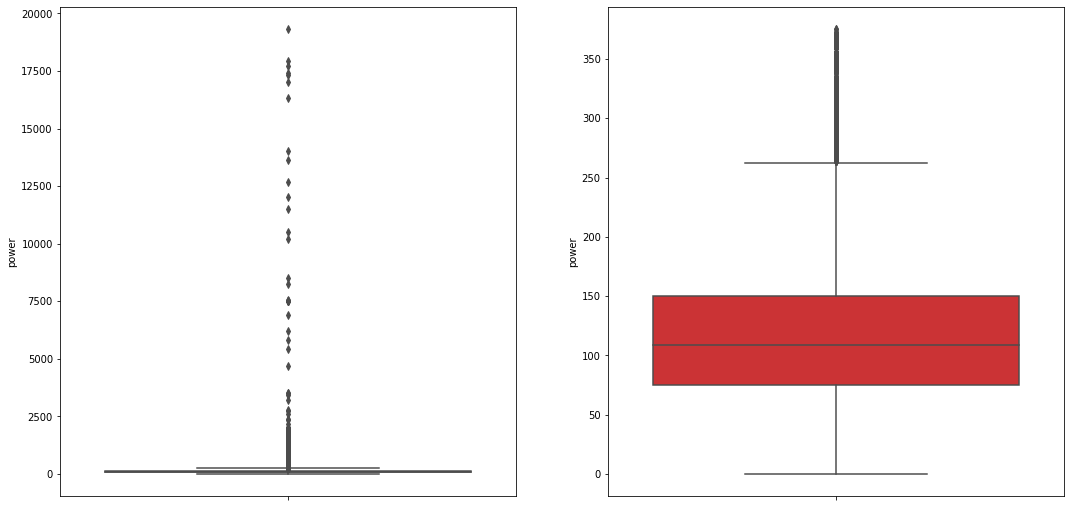

In [16]:
train_test = outliners_proc(train_data, 'power', scale=3)

In [17]:
train_test.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4494
fuelType              8632
gearbox               5954
power                    0
kilometer                0
notRepairedDamage    24220
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [18]:
train_test.power.describe()

count    149037.000000
mean        114.615686
std          64.189762
min           0.000000
25%          75.000000
50%         109.000000
75%         150.000000
max         375.000000
Name: power, dtype: float64

In [19]:
train_data.notRepairedDamage

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

In [22]:
##特征构造
train_data = train_test
train_data['train'] = 1
test_data['train'] = 0
data = pd.concat([train_data, test_data], ignore_index=True)

In [24]:
###构造汽车使用时间，一般来说使用的越长价格越低，成反比
data['usedTime'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [26]:
data.usedTime.isnull().sum()

15054

In [27]:
##计算某品牌的销售统计量
train_gb = train_data.groupby('brand')
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={'index':'brand'})


In [28]:
brand_fe.head()

,brand,brand_amount,brand_price_max,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,31429.0,68500.0,13.0,173719698.0,6261.371627,5527.19
1,1,13656.0,84000.0,15.0,124044603.0,8988.865406,9082.86
2,2,318.0,55800.0,35.0,3766241.0,10576.224444,11806.40
3,3,2461.0,37500.0,65.0,15954226.0,5396.327503,6480.19
4,4,16575.0,99999.0,12.0,138279069.0,8089.863295,8342.13


In [29]:
data = data.merge(brand_fe, how='left', on='brand')

In [30]:
data.head().T

,0,1,2,3,4
SaleID,0,1,2,3,4
name,736,2262,14874,71865,111080
regDate,20040402,20030301,20040403,19960908,20120103
model,30,40,115,109,110
brand,6,1,15,10,5
bodyType,1,2,1,0,1
fuelType,0,0,0,0,0
gearbox,0,0,0,1,0
power,60,0,163,193,68
kilometer,12.5,15,12.5,15,5


In [31]:
##数据分桶
##1.离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展
##2.离散后的特征对异常值更具鲁棒性，如age>30为1否则为0，对于年龄为200的也不会对模型造成很大的干扰
##3.LR属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线形，能够提升模型的表达能力，加大拟合
##4.离散后特征可以进行特征交叉，提升表达能力，有M+N个变量变成M*N个变量，进一步引入了非线形，提升了表达能力
##5.特征离散后模型更稳定。如用户年龄区间，不会因为用户年龄长了一岁就变化

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [32]:
data.power.max()

19211

In [33]:
data[data.train == 1]['power'].max()

375

In [34]:
data.drop(['creatDate', 'regDate', 'regionCode'], axis=1, inplace=True)

In [35]:
data.drop(['offerType', 'seller'], axis=1, inplace=True)

In [36]:
data.to_csv('data_for_tree.csv', index=0)

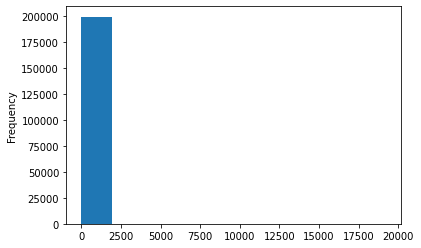

In [37]:
##继续构造一份特征给LR KNN之类的模型用
data.power.plot.hist()

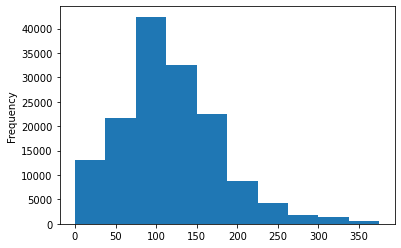

In [38]:
train_data.power.plot.hist()

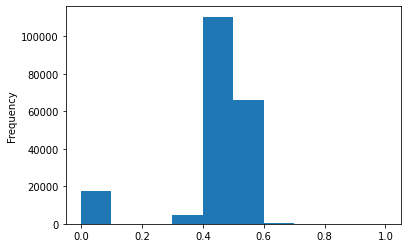

In [43]:
##我们对其取log，在做归一化
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data['power_min_max'] = min_max.fit_transform(np.log(data[['power']] + 1))
data.power_min_max.plot.hist()

In [45]:
data['power'] = data.power_min_max
del data['power_min_max']

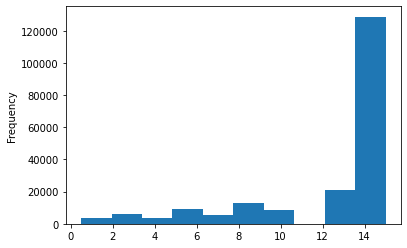

In [46]:
data.kilometer.plot(kind='hist')

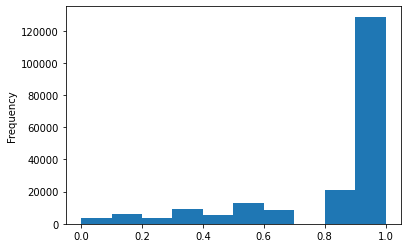

In [47]:
##kilometer 数据正常，直接归一化
data.kilometer = min_max.fit_transform(data[['kilometer']])

data.kilometer.plot.hist()

In [50]:
##对构造特征进行归一化
def min_max_transform(data, col):
    data[col] = min_max.fit_transform(data[[col]])
    return data

label_list = ['brand_price_min', 'brand_price_std', 'brand_price_sum']
for col in label_list:
    data = min_max_transform(data, col)


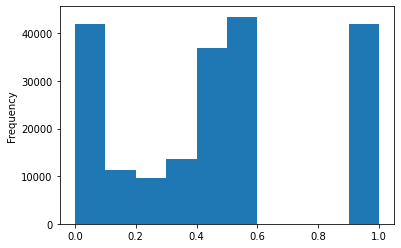

In [49]:
data.brand_amount.plot.hist()

In [51]:
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [52]:
data.to_csv('data_for_lr.csv', index=0)